In [12]:
import h5py
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
import os

# load data from h5 file
n = '004'
file_path = f"output/test_{n}/test_{n}.h5"
slide_path = f"output/test_{n}/slide.jpg"
save_path = f"output/test_{n}/kmeans"

with h5py.File(file_path, 'r') as file:
    feats = file['feats'][:]
    coords = file['coords'][:]

# # for better results for KMeans
# feats = feats.astype(np.float32)

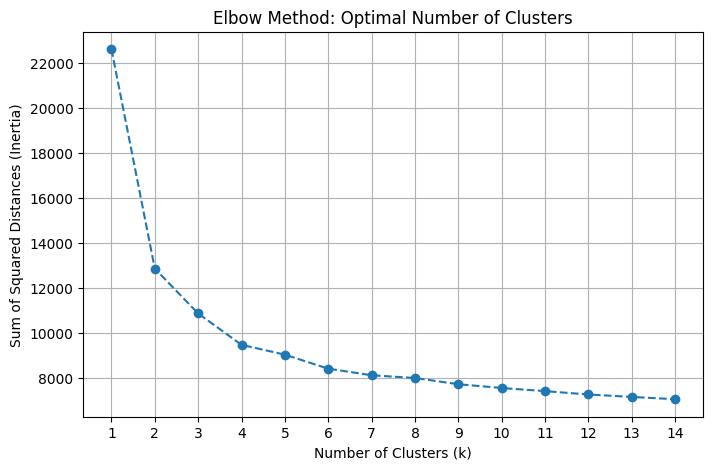

In [13]:
# range of k values to test
k_values = range (1, 15)

# calculate sum of squared distances for each k
ssd = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feats)
    ssd.append(kmeans.inertia_) # inertia = sum of squared distances to cluster centers

# plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, marker='o', linestyle='--')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.xticks(k_values)
plt.grid()
plt.show()

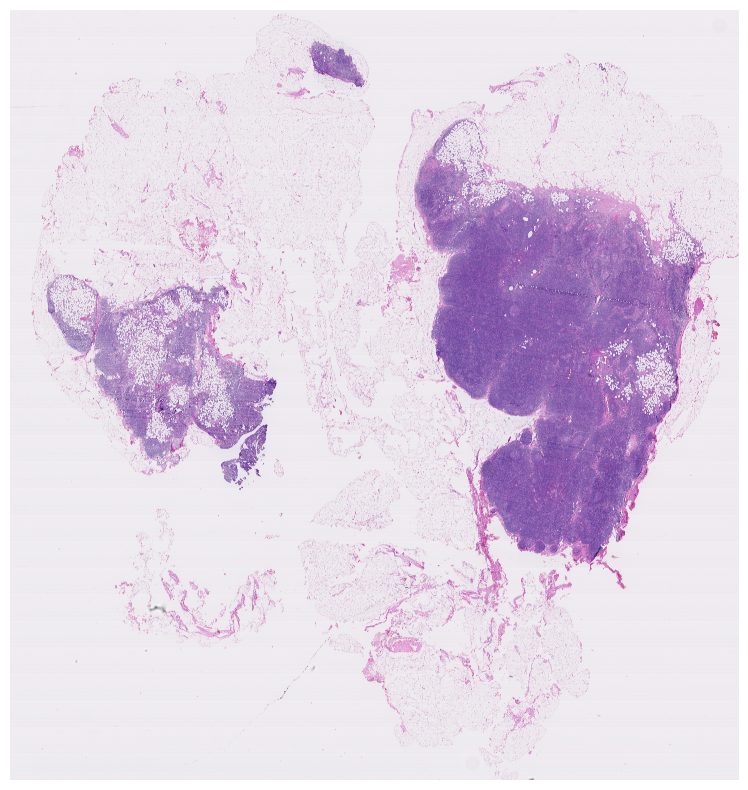

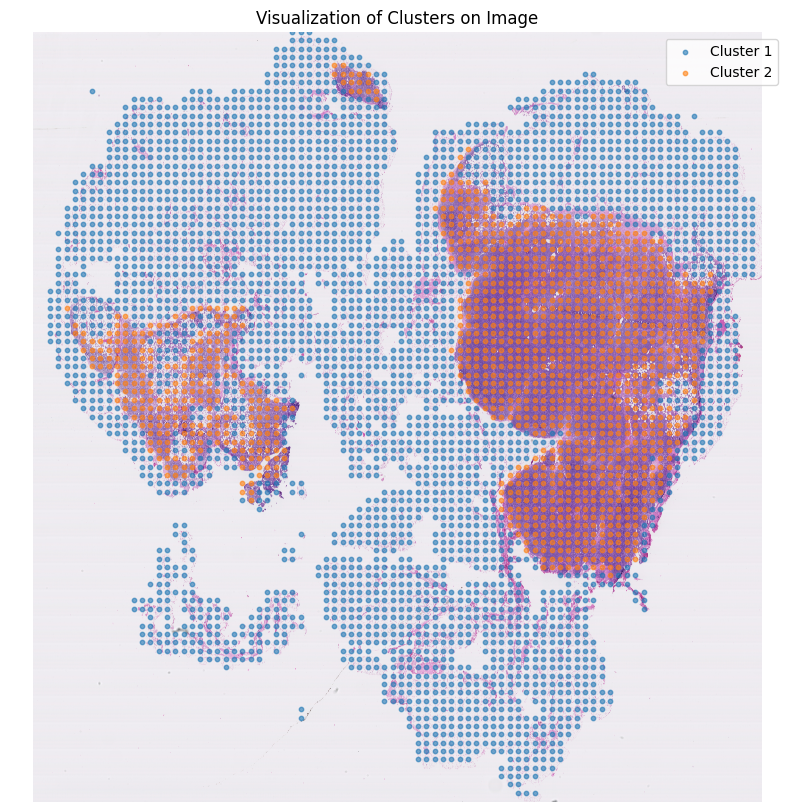

In [14]:
# apply kmeans clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(feats)

# load image
slide_image = cv2.imread(slide_path)
if slide_image is None:
    raise FileNotFoundError(f"Could not load image at {slide_path}")

# plot image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(slide_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

# plot clusters
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(slide_image, cv2.COLOR_BGR2RGB), aspect='auto', alpha=1)

for cluster in range(num_clusters):
    cluster_points = coords[labels == cluster] # extract coordinates that belong to cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                label=f"Cluster {cluster + 1}", alpha=0.6, s=10)

# plot centroids of clusters
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black", marker="x", s=100, label="Centroids")

plt.title("Visualization of Clusters on Image")
plt.legend()
plt.axis("equal")
plt.axis("off")  

# save plot
plt.savefig(os.path.join(save_path + f'_{num_clusters}.png'), bbox_inches='tight', dpi=300)

plt.show()